In [11]:
import requests
import json

api_url_base = "https://api.v2.emissions-api.org/api/v2/" # API url to request from

"""
Retrieve list of valid countries
"""
request = "countries.json" # Product to request
api_url = api_url_base + request # API endpoint
response = requests.get(api_url) # Use get method to make request
print(response.json()) # Use .json method to view json data

{'AE': 'United Arab Emirates', 'AF': 'Afghanistan', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'AL': 'Albania', 'ALB': 'Albania', 'AM': 'Armenia', 'AO': 'Angola', 'AQ': 'Antarctica', 'AR': 'Argentina', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina', 'ARM': 'Armenia', 'AT': 'Austria', 'ATA': 'Antarctica', 'ATF': 'Fr. S. Antarctic Lands', 'AU': 'Australia', 'AUS': 'Australia', 'AUT': 'Austria', 'AZ': 'Azerbaijan', 'AZE': 'Azerbaijan', 'BA': 'Bosnia and Herz.', 'BD': 'Bangladesh', 'BDI': 'Burundi', 'BE': 'Belgium', 'BEL': 'Belgium', 'BEN': 'Benin', 'BF': 'Burkina Faso', 'BFA': 'Burkina Faso', 'BG': 'Bulgaria', 'BGD': 'Bangladesh', 'BGR': 'Bulgaria', 'BHS': 'Bahamas', 'BI': 'Burundi', 'BIH': 'Bosnia and Herz.', 'BJ': 'Benin', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BN': 'Brunei', 'BO': 'Bolivia', 'BOL': 'Bolivia', 'BR': 'Brazil', 'BRA': 'Brazil', 'BRN': 'Brunei', 'BS': 'Bahamas', 'BT': 'Bhutan', 'BTN': 'Bhutan', 'BW': 'Botswana', 'BWA': 'Botswana', 'BY': 'Belarus', 'BZ': 'Belize', 'CA': 'Canada

In [18]:
import requests

api_url_base = "https://api.v2.emissions-api.org/api/v2/" # API url to request from

"""
Retrieve list of available products
"""
request = "products.json" 
api_url = api_url_base + request 
response = requests.get(api_url) 

for x in response.json():
    print(x)

{'description': 'Dry-air mixing ratio of methane for cloud-free observations with a spatial resolution of 7x7km2 observed at about 13:30 local solar time from spectra measured by TROPOMI, total column', 'name': 'methane', 'product_variable': 'methane_mixing_ratio_bias_corrected'}
{'description': 'Atmospheric content of carbon monoxide in `mol m¯²`, total column', 'name': 'carbonmonoxide', 'product_variable': 'carbonmonoxide_total_column'}
{'description': 'Atmospheric content of ozone in `mol m¯²`, total column', 'name': 'ozone', 'product_variable': 'ozone_total_vertical_column'}
{'description': 'Nitrogen dioxide tropospheric column with a spatial resolution of 7x3.5km2 observed at about 13:30 local solar time from spectra measured by TROPOMI, total column', 'name': 'nitrogendioxide', 'product_variable': 'nitrogendioxide_tropospheric_column'}


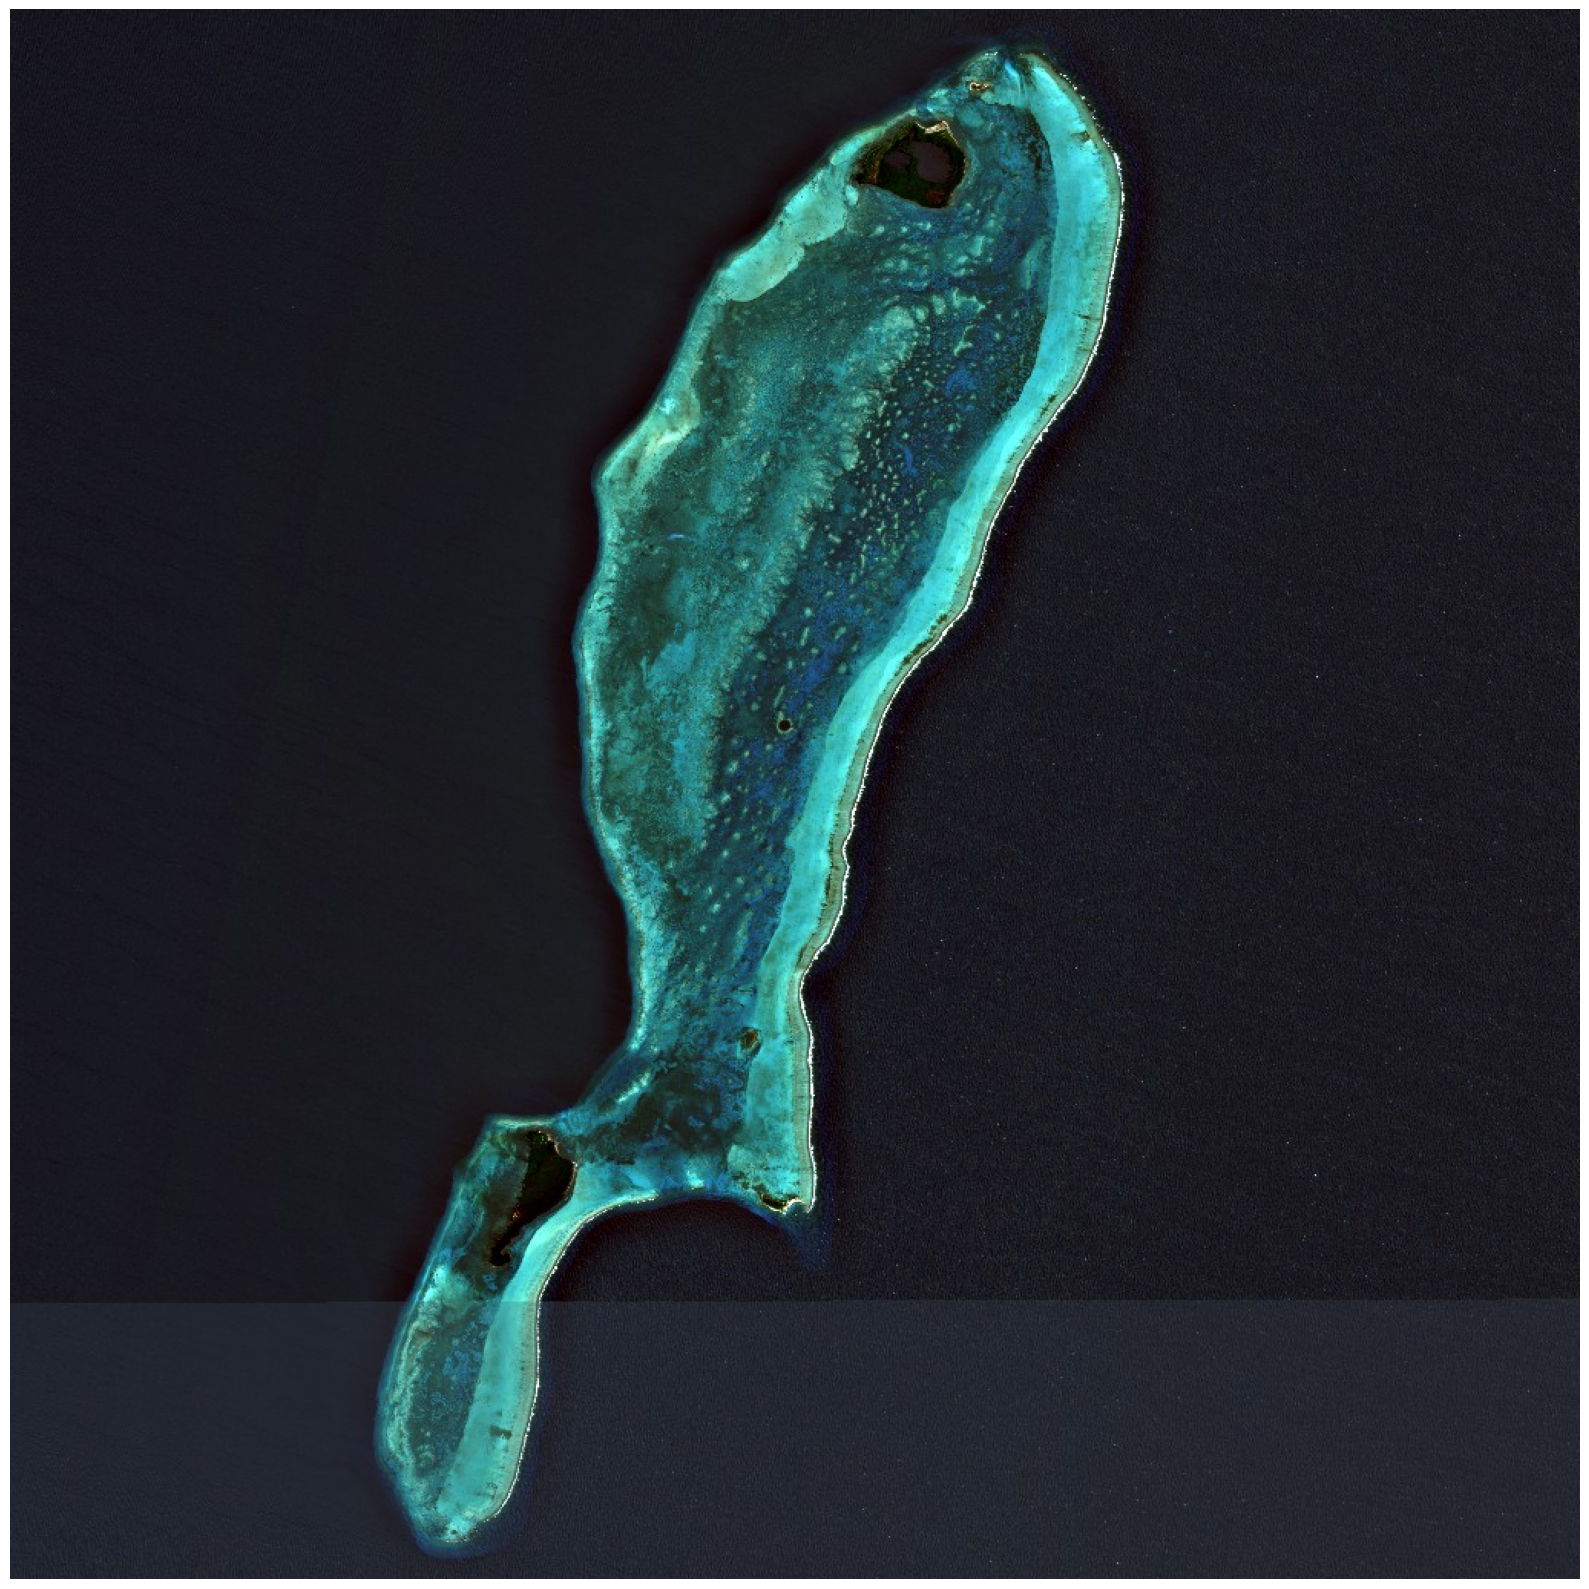

In [6]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

CLIENT_ID = "3a8e596f-4e0d-47b5-8497-0f19cebc482f"
CLIENT_SECRET = "Fr2zIcdT%!Agy!?>j&K+#CZz,V]iq^Mj*sAyaQnE"

# set up credentials
client = BackendApplicationClient(client_id=CLIENT_ID)
oauth = OAuth2Session(client=client)

# get an authentication token
token = oauth.fetch_token(token_url='https://services.sentinel-hub.com/oauth/token',
                          client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

bbox = [-87.72171, 17.11848, -87.342682, 17.481674]
start_date = "2020-06-01"
end_date = "2020-08-31"
collection_id = "sentinel-2-l2a"

evalscript = """
//VERSION=3
function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { 
      bands: 3, 
      sampleType: "AUTO" // default value - scales the output values from [0,1] to [0,255].
    }
  }
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02]
}
"""

json_request = {
    'input': {
        'bounds': {
            'bbox': bbox,
            'properties': {
                'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'
            }
        },
        'data': [
            {
                'type': 'S2L2A',
                'dataFilter': {
                    'timeRange': {
                        'from': f'{start_date}T00:00:00Z',
                        'to': f'{end_date}T23:59:59Z'
                    },
                    'mosaickingOrder': 'leastCC',
                },
            }
        ]
    },
    'output': {
        'width': 1024,
        'height': 1024,
        'responses': [
            {
                'identifier': 'default',
                'format': {
                    'type': 'image/jpeg',
                }
            }
        ]
    },
"evalscript": evalscript
}

# Set the request url and headers
url_request = 'https://services.sentinel-hub.com/api/v1/process'
headers_request = {
    "Authorization" : "Bearer %s" %token['access_token']
}

#Send the request
response = oauth.request(
    "POST", url_request, headers=headers_request, json = json_request
)

# read the image as numpy array
image_arr = np.array(Image.open(io.BytesIO(response.content)))

# plot the image for visualization
plt.figure(figsize=(16,16))
plt.axis('off')
plt.tight_layout()
plt.imshow(image_arr)